# Gradient Boost Techniques Assignment

## Dataset: www.kaggle.com [Flight delays]


## GBM Classifier Techniques

In [108]:
##Import all the libraries, note always run after restarting the colab
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier

In [109]:
! pip install catboost
! pip install yellowbrick
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.classifier import ConfusionMatrix

import lightgbm as lgb
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
import xgboost as xgb
import catboost as cb

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

####Data Preparation using first data enrichment (add dataset to base data set) 

In [110]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving flight_delays_train.csv to flight_delays_train (1).csv


In [111]:
import io
train = pd.read_csv(io.StringIO(uploaded['flight_delays_train.csv'].decode('utf-8')))
train

Month DayofMonth DayOfWeek  ...  Dest Distance dep_delayed_15min
0       c-8       c-21       c-7  ...   DFW      732                 N
1       c-4       c-20       c-3  ...   MCO      834                 N
2       c-9        c-2       c-5  ...   CLE      416                 N
3      c-11       c-25       c-6  ...   MEM      872                 N
4      c-10        c-7       c-6  ...   OMA      423                 Y
...     ...        ...       ...  ...   ...      ...               ...
99995   c-5        c-4       c-3  ...   RDD      199                 N
99996   c-1       c-18       c-3  ...   DAB      884                 N
99997   c-1       c-24       c-2  ...   IAH     1076                 N
99998   c-4       c-27       c-4  ...   GGG      140                 N
99999  c-11       c-17       c-4  ...   SMF      605                 N

[100000 rows x 9 columns]

In [112]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
test = pd.read_csv(io.StringIO(uploaded['flight_delays_test.csv'].decode('utf-8')))

Saving flight_delays_test.csv to flight_delays_test (1).csv


In [113]:
X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values

X_train_part, X_valid, y_train_part, y_valid = \
    train_test_split(X_train, y_train, 
                     test_size=0.3, random_state=17)

#### XGBoost Classifier

Confusion matrix

 [[20529  3680]
 [ 4096  1695]]


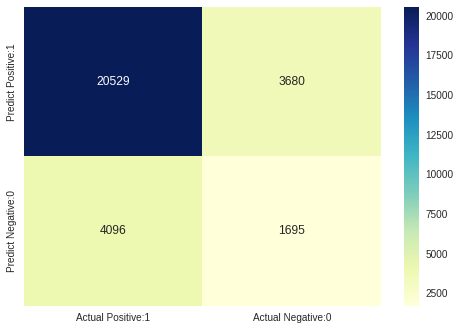

In [118]:
from sklearn.metrics import roc_auc_score
# build the model
xgb_model = XGBClassifier(seed=17)

xgb_model.fit(X_train_part, y_train_part)
# predict the results
xgb_valid_pred = xgb_model.predict_proba(X_valid)[:, 1]

roc_auc_score(y_valid, xgb_valid_pred)

print('Confusion matrix\n\n', cm)
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [119]:
xgb_model.fit(X_train, y_train)
xgb_test_pred = xgb_model.predict_proba(X_test)[:, 1]

pd.Series(xgb_test_pred, 
          name='dep_delayed_15min').to_csv('xgb_2feat.csv', 
                                           index_label='id', header=True)

In [120]:
X = train[['Distance', 'DepTime']].values
y = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [121]:
y_Reg = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_Reg = test[['Distance', 'DepTime']].values
X_train_Reg, X_test_Reg, y_train_Reg, y_test_Reg = train_test_split(X_Reg, y_Reg, test_size=0.30)

### XGBoost Regression

[06:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Tabular data result
R^2: -0.0014158781165201084
Adjusted R^2: -0.001482645851834885
MAE: 0.3088531456500292

Prediction Data Plot-1


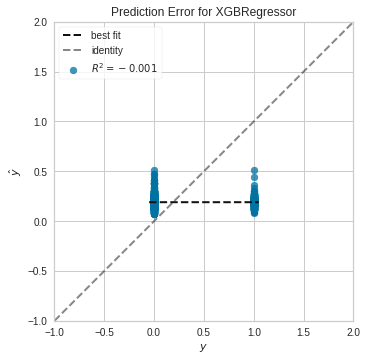

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3eb5f8510>,
                estimator=XGBRegressor())

Residuals Plot -2 


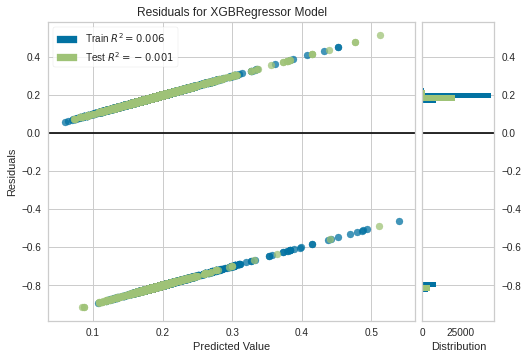

In [122]:

# build the model
xgb_reg = XGBRegressor()

xgb_reg.fit(X_train_Reg, y_train_Reg)

y_pred_Reg=xgb_reg.predict(X_test_Reg)

# Model Evaluation and Prediction
print("Tabular data result")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))

# Making the Prediction Error Plot
print("\nPrediction Data Plot-1")
print(prediction_error(xgb_reg, X_train_Reg, y_train_Reg, X_test_Reg, y_test_Reg))

# Making the Residuals Plot
print("\nResiduals Plot -2 ")
visualizer = ResidualsPlot(xgb_reg)
visualizer.fit(X_train_Reg , y_train_Reg )  # Fit the training data to the visualizer
visualizer.score(X_test_Reg , y_test_Reg )  # Evaluate the model on the test data
visualizer.show() 


### LightGBM Classifier

Tabular data result
LightGBM Classifier Model accuracy score: 0.8114
Training-set accuracy score: 0.8182
Training set score: 0.8182
Test set score: 0.8114
Confusion matrix

 [[23974   235]
 [ 5423   368]]

True Positives(TP) =  23974

True Negatives(TN) =  368

False Positives(FP) =  235

False Negatives(FN) =  5423
****************************************
              precision    recall  f1-score   support

           0       0.82      0.99      0.89     24209
           1       0.61      0.06      0.12      5791

    accuracy                           0.81     30000
   macro avg       0.71      0.53      0.50     30000
weighted avg       0.78      0.81      0.74     30000

****************************************


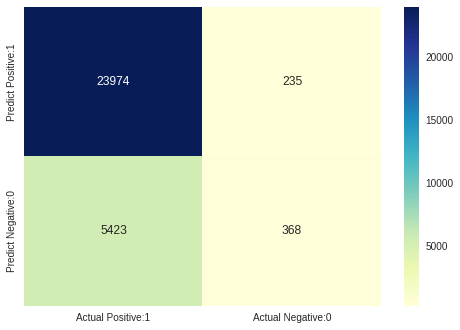

In [ ]:
# build the model
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("Tabular data result")
print('LightGBM Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
# view confusion-matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))


### LightGBM Regressor

Tabular data result
R^2: -0.003063914603778306
Adjusted R^2: -0.003130792219180112
MAE: 0.3095410461576174

Prediction Plot-1


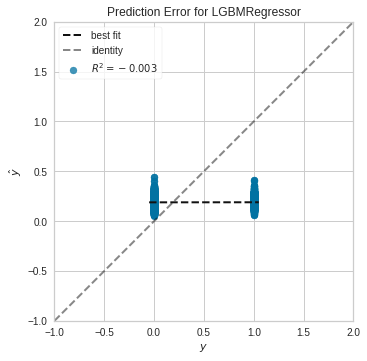

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3eb816190>,
                estimator=LGBMRegressor())

Residuals Plot-2


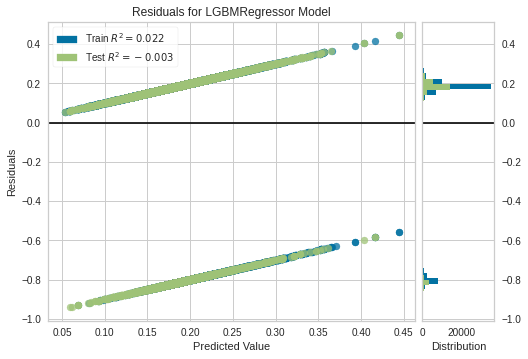

In [ ]:
# build the model
lgb_reg = lgb.LGBMRegressor()

lgb_reg.fit(X_train_Reg, y_train_Reg)

# predict the results
y_pred_Reg=lgb_reg.predict(X_test_Reg)
# Model Evaluation
print("Tabular data result")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))

# Making the Prediction Error Plot
print("\nPrediction Plot-1")
print(prediction_error(lgb_reg, X_train_Reg, y_train_Reg, X_test_Reg, y_test_Reg))

# Making the Residuals Plot
print("\nResiduals Plot-2")
visualizer = ResidualsPlot(lgb_reg)
visualizer.fit(X_train_Reg , y_train_Reg )  # Fit the training data to the visualizer
visualizer.score(X_test_Reg , y_test_Reg )  # Evaluate the model on the test data
visualizer.show() 

### Catboost Classifier

Tabular data result
CatBoost Classifier Model accuracy score: 0.8109
Training-set accuracy score: 0.8182
Training set score: 0.8182
Test set score: 0.8109
Confusion matrix

 [[23971   238]
 [ 5436   355]]

True Positives(TP) =  23971

True Negatives(TN) =  355

False Positives(FP) =  238

False Negatives(FN) =  5436
****************************************
              precision    recall  f1-score   support

           0       0.82      0.99      0.89     24209
           1       0.60      0.06      0.11      5791

    accuracy                           0.81     30000
   macro avg       0.71      0.53      0.50     30000
weighted avg       0.77      0.81      0.74     30000



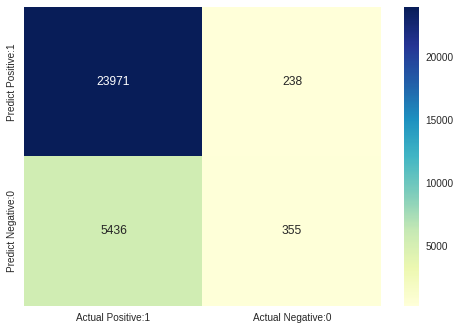

In [ ]:
# build the model
clf = CatBoostClassifier(verbose=0, n_estimators=100)
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("Tabular data result")
print('CatBoost Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print(classification_report(y_test, y_pred))


### Catboost Regressor

In [126]:
# build the model
cb_reg = CatBoostRegressor()

cb_reg.fit(X_train_Reg, y_train_Reg)

# predict the results
y_pred_Reg=cb_reg.predict(X_test_Reg)

# Model Evaluation
print("Tabular data result")
print('R^2:',r2_score(y_test_Reg, y_pred_Reg))
print('Adjusted R^2:',
      1 - (1-r2_score(y_test_Reg, y_pred_Reg))*(len(y_test_Reg)-1)/(len(y_test_Reg)-X_test_Reg.shape[1]-1))
print('MAE:',mean_absolute_error(y_test_Reg, y_pred_Reg))

Learning rate set to 0.080113
0:	learn: 0.3922654	total: 7.84ms	remaining: 7.83s
1:	learn: 0.3922583	total: 15.2ms	remaining: 7.59s
2:	learn: 0.3922505	total: 24.8ms	remaining: 8.23s
3:	learn: 0.3922455	total: 32.2ms	remaining: 8.03s
4:	learn: 0.3922372	total: 39.6ms	remaining: 7.88s
5:	learn: 0.3922305	total: 47ms	remaining: 7.78s
6:	learn: 0.3922196	total: 54.4ms	remaining: 7.72s
7:	learn: 0.3922143	total: 62ms	remaining: 7.69s
8:	learn: 0.3922083	total: 70.3ms	remaining: 7.74s
9:	learn: 0.3922002	total: 77.9ms	remaining: 7.72s
10:	learn: 0.3921888	total: 85.3ms	remaining: 7.67s
11:	learn: 0.3921835	total: 92.5ms	remaining: 7.62s
12:	learn: 0.3921731	total: 100ms	remaining: 7.61s
13:	learn: 0.3921692	total: 108ms	remaining: 7.58s
14:	learn: 0.3921646	total: 116ms	remaining: 7.59s
15:	learn: 0.3921555	total: 123ms	remaining: 7.56s
16:	learn: 0.3921499	total: 130ms	remaining: 7.54s
17:	learn: 0.3921445	total: 138ms	remaining: 7.53s
18:	learn: 0.3921399	total: 146ms	remaining: 7.52s
19:

### Random Forest Classifier

Tabular data result
Random Forest Classifier Model accuracy score: 0.7759
Training-set accuracy score: 0.9848
Training set score: 0.9848
Test set score: 0.7759
Confusion matrix

 [[22069  2140]
 [ 4582  1209]]

True Positives(TP) =  22069

True Negatives(TN) =  1209

False Positives(FP) =  2140

False Negatives(FN) =  4582
****************************************
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     24209
           1       0.36      0.21      0.26      5791

    accuracy                           0.78     30000
   macro avg       0.59      0.56      0.57     30000
weighted avg       0.74      0.78      0.75     30000



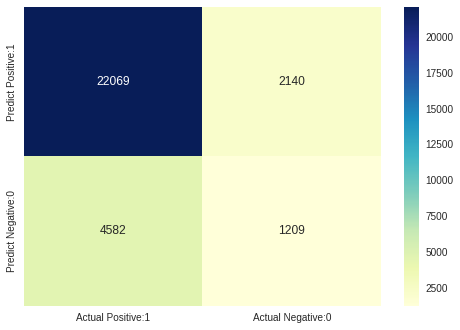

In [ ]:
# build the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("Tabular data result")
print('Random Forest Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
# view confusion-matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))


### AdaBoost Classifier

Tabular data result
ADA Boost Model accuracy score: 0.8084
Training-set accuracy score: 0.8129
Training set score: 0.8129
Test set score: 0.8084
Confusion matrix

 [[24113    96]
 [ 5652   139]]

True Positives(TP) =  24113

True Negatives(TN) =  139

False Positives(FP) =  96

False Negatives(FN) =  5652
****************************************
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     24209
           1       0.59      0.02      0.05      5791

    accuracy                           0.81     30000
   macro avg       0.70      0.51      0.47     30000
weighted avg       0.77      0.81      0.73     30000



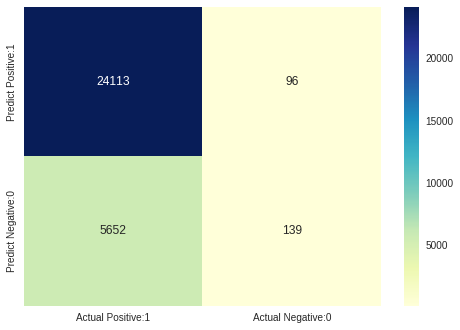

In [ ]:
# build the model
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("Tabular data result")
print('ADA Boost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print("****************************************")

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))


### Decision Tree Classifier


Tabular data result
Decision Tree Classifier Model accuracy score: 0.7408
Training-set accuracy score: 0.9849
Training set score: 0.9849
Test set score: 0.7408
Confusion matrix

 [[20529  3680]
 [ 4096  1695]]

True Positives(TP) =  20529

True Negatives(TN) =  1695

False Positives(FP) =  3680

False Negatives(FN) =  4096
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     24209
           1       0.32      0.29      0.30      5791

    accuracy                           0.74     30000
   macro avg       0.57      0.57      0.57     30000
weighted avg       0.73      0.74      0.74     30000



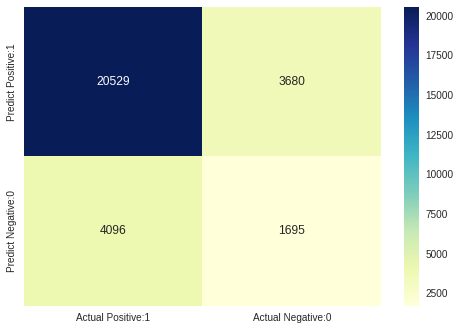

In [ ]:
# build the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

# view accuracy
accuracy=accuracy_score(y_pred, y_test)
print("Tabular data result")
print('Decision Tree Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
# view confusion-matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

print(classification_report(y_test, y_pred))


# GradientBoost Ranking Techniques

## CatBoost Ranking

In [ ]:
from catboost import CatBoostRanker, Pool, MetricVisualizer
from catboost.datasets import msrank_10k
from copy import deepcopy
import os

In [ ]:
train_df, test_df = msrank_10k()

X_train = train_df.drop([0, 1], axis=1).values
y_train = train_df[0].values
queries_train = train_df[1].values

X_test = test_df.drop([0, 1], axis=1).values
y_test = test_df[0].values
queries_test = test_df[1].values

In [ ]:
num_documents = X_train.shape[0]
print(num_documents)

10000


In [ ]:
from collections import Counter
Counter(y_train).items()

dict_items([(2.0, 1326), (0.0, 5481), (1.0, 3000), (3.0, 142), (4.0, 51)])

In [ ]:
max_relevance = np.max(y_train)
y_train /= max_relevance
y_test /= max_relevance

num_queries = np.unique(queries_train).shape[0]
num_queries

87

In [ ]:
train = Pool(
    data=X_train,
    label=y_train,
    group_id=queries_train
)

test = Pool(
    data=X_test,
    label=y_test,
    group_id=queries_test
)

In [ ]:
data_dir = './msrank'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

train_file = os.path.join(data_dir, 'train.csv')
test_file = os.path.join(data_dir, 'test.csv')

train_df.to_csv(train_file, index=False, header=False)
test_df.to_csv(test_file, index=False, header=False)

In [ ]:
description_file = os.path.join(data_dir, 'dataset.cd')
with open(description_file, 'w') as f:
    f.write('0\tLabel\n')
    f.write('1\tQueryId\n')

In [ ]:
Pool(data=train_file, column_description=description_file, delimiter=',')

In [ ]:
default_parameters = {
    'iterations': 10000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
}

parameters = {}

In [ ]:
def fit_cat_boost_model(loss_function, additional_params=None, train_pool=train, test_pool=test):
    parameters = deepcopy(default_parameters)
    parameters['loss_function'] = loss_function
    parameters['train_dir'] = loss_function
    
    if additional_params is not None:
        parameters.update(additional_params)
        
    model = CatBoostRanker(**parameters)
    model.fit(train_pool, eval_set=test_pool, plot=True)
    
    return model

In [ ]:
model = fit_cat_boost_model('RMSE', {'custom_metric': ['PrecisionAt:top=10', 'RecallAt:top=10', 'MAP:top=10']})

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
X_test_cat = X_train
predictions = model.predict(X_train)

In [ ]:
##CatBoost Ranking predictions
predictions

array([0.3010463 , 0.31311426, 0.4488022 , 0.64430314, 0.2737185 ,
       0.39997652, 0.41492054, 0.36399758, 0.37237096, 0.40794724,
       0.34348536, 0.3960507 , 0.40626353, 0.23033962, 0.19728449,
       0.302117  , 0.39744845, 0.543915  , 0.3397259 , 0.49371403,
       0.35978115, 0.46170482, 0.37237096, 0.38994882, 0.5315803 ,
       0.49945974, 0.48241684, 0.38866842, 0.41544315, 0.6656138 ,
       0.34589994, 0.2076715 , 0.65382326, 0.547298  , 0.39993554,
       0.65382326, 0.33662015, 0.31311426, 0.3100246 , 0.3581462 ,
       0.42583466, 0.455538  , 0.35726514, 0.5006013 , 0.3831213 ,
       0.44732076, 0.53111345, 0.39744845, 0.5144416 , 0.455538  ,
       0.6065774 , 0.41795772, 0.49353307, 0.66926754, 0.5144416 ,
       0.35010135, 0.55668247, 0.27326822, 0.34676167, 0.40794724,
       0.34676167, 0.3510806 , 0.36522704, 0.34676167, 0.56654054,
       0.53111345, 0.66926754, 0.4035275 , 0.36600456, 0.38866842,
       0.34676167, 0.56214726, 0.56910855, 0.31311426, 0.64516

##XGBoost Ranking

In [ ]:
xgBoost_df = pd.DataFrame({
    "query_id":[i for i in range(100) for j in range(10)],
    "var1":np.random.random(size=(1000,)),
    "var2":np.random.random(size=(1000,)),
    "var3":np.random.random(size=(1000,)),
    "relevance":list(np.random.permutation([0,0,0,0,0, 0,0,0,1,1]))*100
})

In [ ]:
import xgboost as xgb
train_df = xgBoost_df[:800]
validation_df = xgBoost_df[800:]

qids_train = train_df.groupby("query_id")["query_id"].count().to_numpy()
X_train = train_df.drop(["query_id", "relevance"], axis=1)
y_train = train_df["relevance"]

qids_validation = validation_df.groupby("query_id")["query_id"].count().to_numpy()
X_validation = validation_df.drop(["query_id", "relevance"], axis=1)
y_validation = validation_df["relevance"]

In [ ]:
params = {'objective': 'rank:ndcg', 'learning_rate': 0.1,
          'gamma': 1.0, 'min_child_weight': 0.1,
          'max_depth': 6, 'n_estimators': 4}
model = xgb.sklearn.XGBRanker(**params)
model.fit(X_train, y_train, qids_train, verbose=True,
          eval_set=[(X_validation, y_validation)], eval_group=[qids_validation])
pred = model.predict(X_validation)

[0]	eval_0-map:0.348899
[1]	eval_0-map:0.332262
[2]	eval_0-map:0.366389
[3]	eval_0-map:0.403552


## LightGBM Ranking

In [ ]:
gbm = lgb.LGBMRanker()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]
query_test = [X_test.shape[0]]
print(query_train, query_val, query_test)

[512] [128] [10000]


In [ ]:
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[5, 10, 20], early_stopping_rounds=50)

[1]	valid_0's ndcg@5: 0.131205	valid_0's ndcg@10: 0.148764	valid_0's ndcg@20: 0.166752
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.14479
[3]	valid_0's ndcg@5: 0.16958	valid_0's ndcg@10: 0.18341	valid_0's ndcg@20: 0.150705
[4]	valid_0's ndcg@5: 0.146068	valid_0's ndcg@10: 0.161043	valid_0's ndcg@20: 0.103932
[5]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0.0783983	valid_0's ndcg@20: 0.117524
[6]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.0701717
[7]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.0652033
[8]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.032865
[9]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0
[10]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.032865
[11]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.032865
[12]	valid_0's ndcg@5: 0	valid_0's ndcg@10: 0	valid_0's ndcg@20: 0.0323383
[13]	valid_0's n

LGBMRanker()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
test_pred = gbm.predict(X_val)
test_pred

array([ 0.01221182, -0.00367921, -0.10583266, -0.05270321, -0.06811985,
       -0.02395846,  0.01416693, -0.01702434, -0.05516032, -0.00249948,
       -0.12203805, -0.090818  , -0.13826499, -0.07383697, -0.07564378,
        0.00567558, -0.13826499, -0.09989843,  0.04272772, -0.0799932 ,
       -0.02613504, -0.11315659, -0.06770609, -0.13826499,  0.0064988 ,
       -0.02613504,  0.01863835, -0.01702434, -0.02613504, -0.090818  ,
        0.04976781,  0.01265644, -0.10937797,  0.01416693, -0.00970121,
       -0.13826499,  0.03488634, -0.07785353, -0.09868871, -0.06269368,
        0.10207209, -0.09722699, -0.09741788, -0.0956409 , -0.09722699,
       -0.08384213, -0.09336552, -0.00979319, -0.05756658, -0.12203805,
        0.04536156, -0.05397225, -0.02395846])